In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data.data.shape

(569, 30)

In [5]:
x = data.data
y = data.target

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8)

In [7]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
train_x = st.fit_transform(train_x)
test_x = st.transform(test_x)

In [8]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=train_x.shape[1]),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
r = model.fit(train_x,train_y,epochs=100,validation_data=(test_x,test_y))

Epoch 1/100
15/15 [==============================] - 1s 33ms/step - loss: 0.9217 - accuracy: 0.4122 - val_loss: 0.8159 - val_accuracy: 0.4912
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8200 - accuracy: 0.5478 - val_loss: 0.7152 - val_accuracy: 0.5526
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7330 - accuracy: 0.6120 - val_loss: 0.6315 - val_accuracy: 0.6316
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.6731 - val_loss: 0.5626 - val_accuracy: 0.6754
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5992 - accuracy: 0.7235 - val_loss: 0.5054 - val_accuracy: 0.7719
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5292 - accuracy: 0.7827 - val_loss: 0.4587 - val_accuracy: 0.8333
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.8000 - val_loss: 0.4198 - val_accuracy: 0.8772
Epoch 8/100


In [10]:
model.evaluate(train_x,train_y)

15/15 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9802


[0.09772814810276031, 0.9802197813987732]

In [11]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.9737


[0.08369562029838562, 0.9736841917037964]

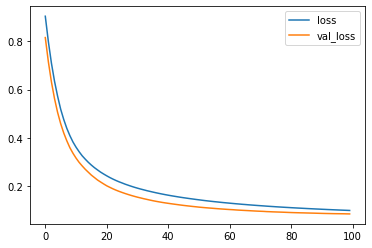

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

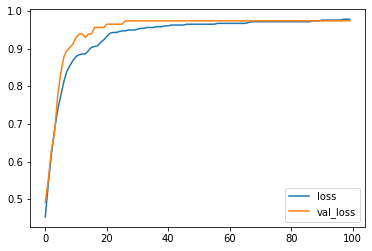

In [13]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.legend()

## Regression Model

In [14]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-12-27 04:25:23--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-12-27 04:25:24 (37.9 MB/s) - ‘moore.csv’ saved [2302/2302]



In [15]:
!ls

moore.csv  sample_data


In [16]:
import pandas as pd
data = pd.read_csv('moore.csv',header=None).values
#data.columns = ['year','transister']
x = data[:,0].reshape(-1,1)
y = data[:,1]

In [23]:
x.shape

(162, 1)

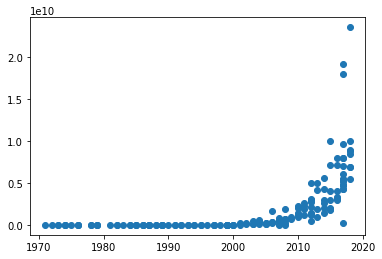

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [19]:
import numpy as np

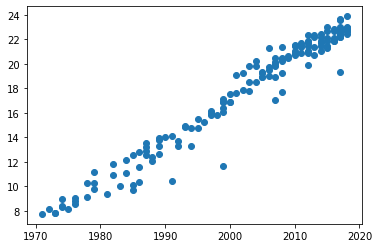

In [20]:
y = np.log(y)
plt.scatter(x,y)

In [21]:
x = x-x.mean()

In [22]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=[1,]),
                                    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.0001,0.9),loss='mse')

def sedule(epochs,lr):
  if epochs>=50:
    return 0.001
  return 0.0001
schedule = tf.keras.callbacks.LearningRateScheduler(sedule)

In [ ]:
r = model.fit(x,y,epochs=200,callbacks=[schedule])

In [ ]:
model.evaluate(x,y)

In [ ]:
plt.plot(r.history['loss'], label='loss')

In [ ]:
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

In [ ]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
print("Time to double:", np.log(2) / a)

In [ ]:
Yhat = model.predict(x).flatten()
plt.scatter(x,y)
plt.plot(x, Yhat)

In [ ]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
x = x.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (x.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

In [ ]:
model.save('morresLaw.h5')

In [ ]:
!ls

In [ ]:
m1 = tf.keras.models.load_model('morresLaw.h5')

In [ ]:
m1.layers[0].get_weights()

In [ ]:
from google.colab import files
files.download('morresLaw.h5')